In [11]:
import sys, os
sys.path.insert(0, '../../')
from pathlib import Path
import math
import numpy as np
import matplotlib.pyplot as plt 
from gasp import dataloader, view

In [12]:
path = Path('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/')

In [13]:
valid_filetypes=['.dat']
files = []
for item in path.iterdir():
    if os.path.isfile(item) and item.suffix in valid_filetypes:
        files.append(item)
files

[PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID189_bSSFP_fa30_FID29093.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID188_bSSFP_fa20_FID29092.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID187_bSSFP_fa10_FID29091.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID200_bSSFP_fa65_FID29104.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID190_bSSFP_fa40_FID29094.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID192_bSSFP_fa60_FID29096.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID196_bSSFP_fa25_FID29100.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID199_bSSFP_fa55_FID29103.dat'),
 PosixPath('/Users/michael/proje

In [14]:
sortedfiles = []
flipangles = ['fa10','fa15','fa20','fa25','fa30','fa35','fa40','fa45','fa50','fa55','fa60','fa65','fa70']
for angle in flipangles:
    for file in files:
        if angle in file.name:
            sortedfiles.append(file)

sortedfiles

[PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID187_bSSFP_fa10_FID29091.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID195_bSSFP_fa15_FID29099.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID188_bSSFP_fa20_FID29092.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID196_bSSFP_fa25_FID29100.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID189_bSSFP_fa30_FID29093.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID197_bSSFP_fa35_FID29101.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID190_bSSFP_fa40_FID29094.dat'),
 PosixPath('/Users/michael/projects/MRI/data/2022_07_27_bSSFP_FlipAngleExperiment/meas_MID198_bSSFP_fa45_FID29102.dat'),
 PosixPath('/Users/michael/proje

In [15]:
%%capture
M = []
for file in sortedfiles:
    data = dataloader.read_rawdata(file, doChaAverage = False);
    M.append(data['data'])

In [16]:
Mall = np.stack(M)
print(np.max(abs(Mall)), np.min(abs(Mall)), np.mean(abs(Mall)), np.std(abs(Mall)))
vmax = np.mean(abs(Mall) + 2 * np.std(abs(Mall)))

1.6128285008684885e-05 1.1564075363844618e-12 6.377059679416871e-08 9.957380451463117e-08


In [17]:
M[0].shape

(4, 198, 200, 32, 8)

(4, 198, 200)

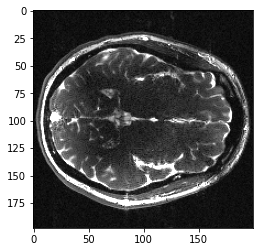

In [25]:
data = np.sqrt(np.sum(M[0]**2, axis=(3,4)))
plt.imshow(abs(m[0, :, :]), cmap='gray', vmax=8*vmax)
data.shape

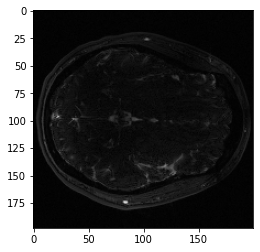

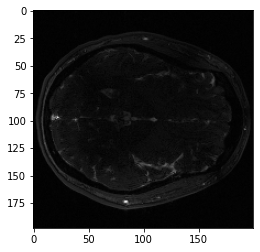

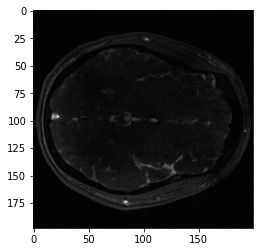

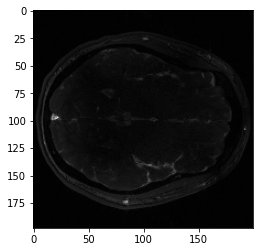

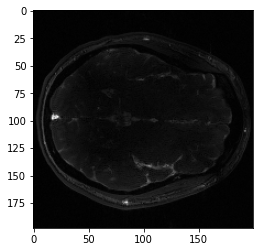

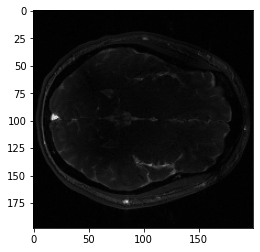

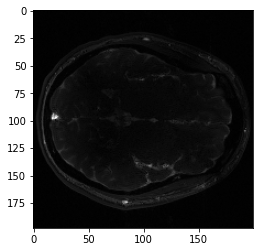

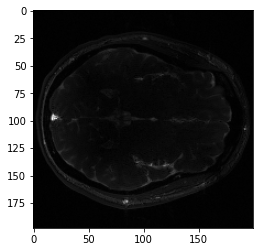

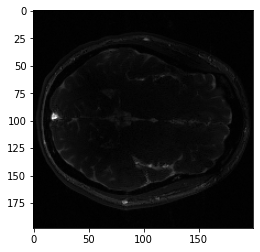

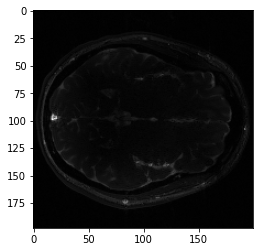

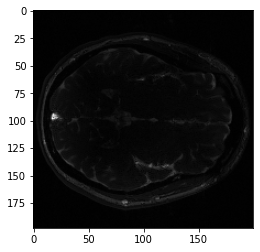

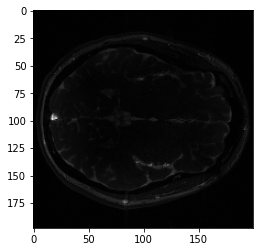

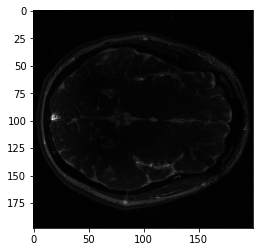

In [21]:
for m in M:
    m = np.sqrt(np.sum(m**2, axis=(3,4)))
    plt.imshow(abs(m[0, :, :]), cmap='gray', vmax=vmax)
    plt.show()

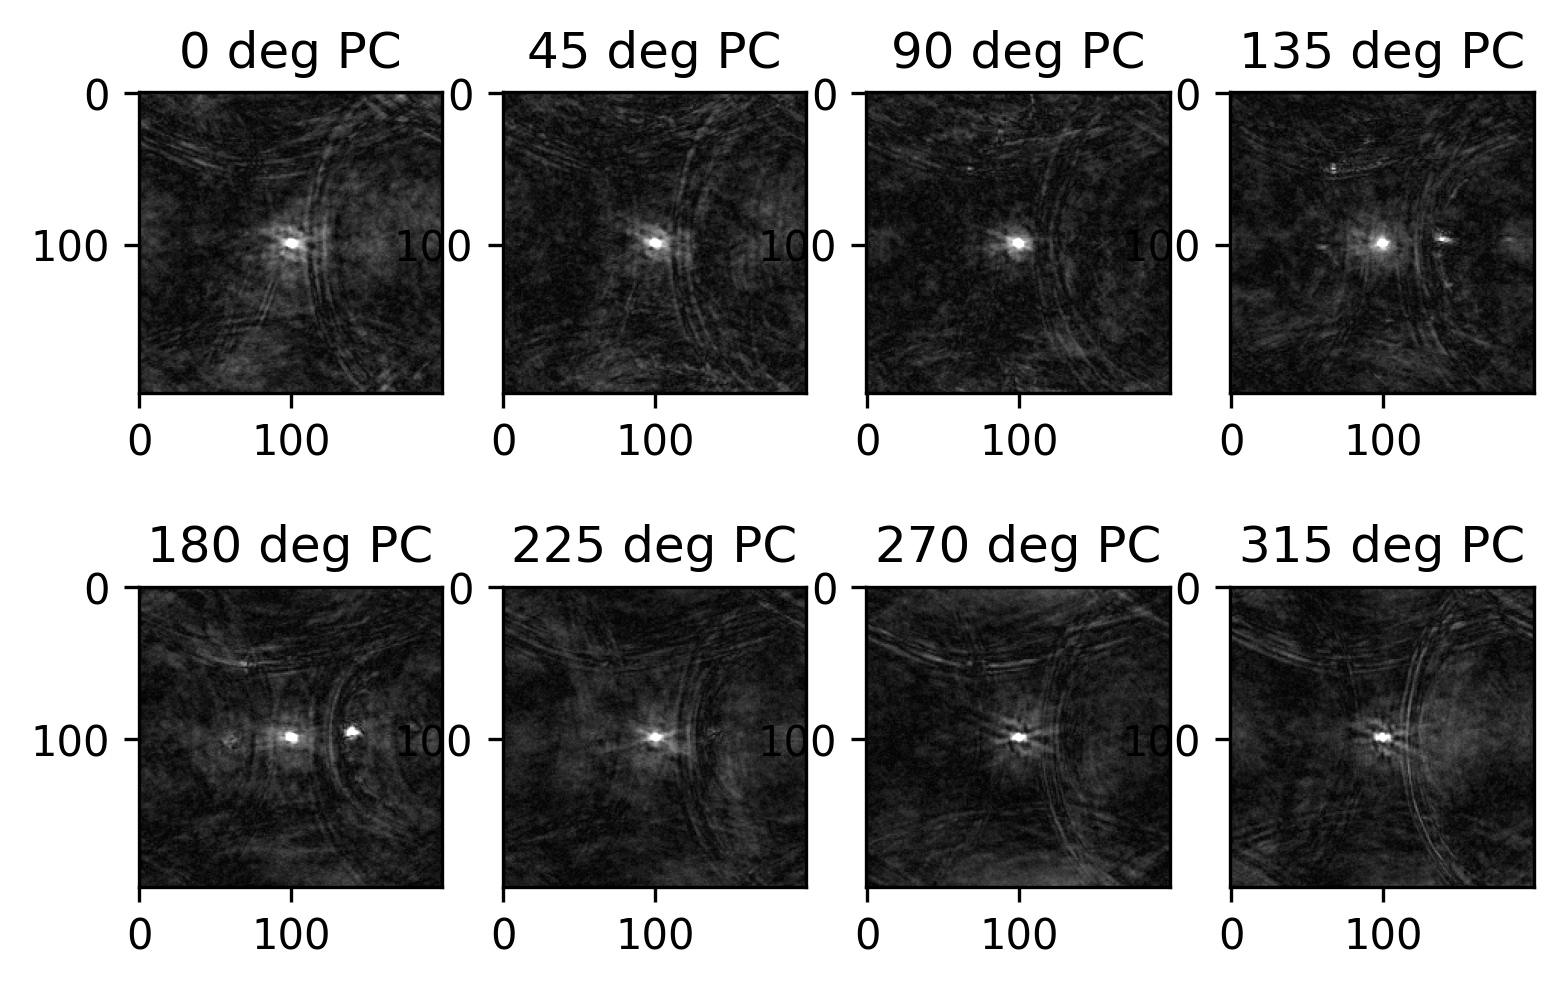

In [9]:
m = M[3]

nx, ny = 2, 4
npcs = nx * ny
slice = 0
plt.figure(dpi=300)
for ii in range(npcs):
    _data = np.abs(m[slice, :, :, ii])
    plt.subplot(nx, ny, ii+1)
    plt.imshow(_data, cmap='gray', vmax=math.sqrt(8)*vmax)
    plt.title('%d deg PC' % (ii*(360/npcs)))
plt.show()

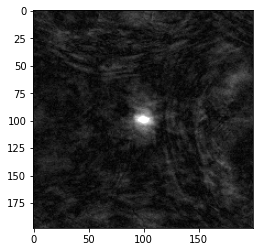

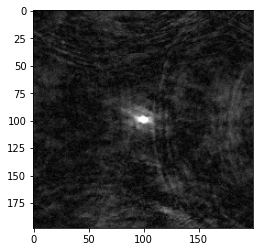

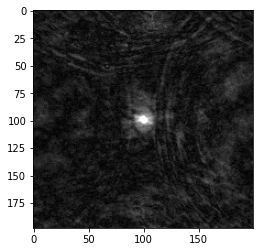

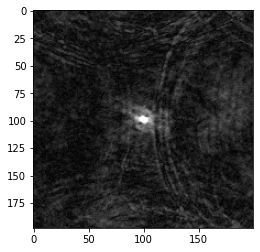

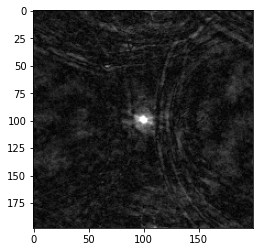

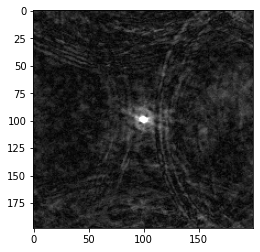

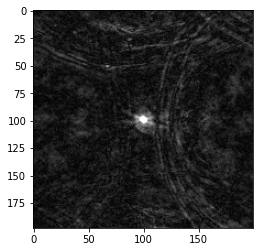

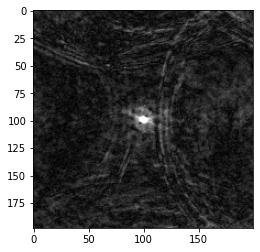

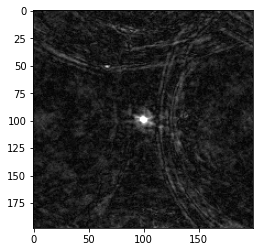

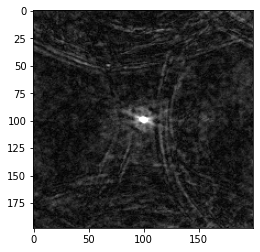

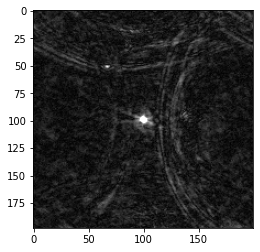

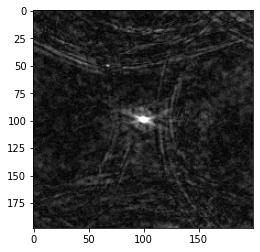

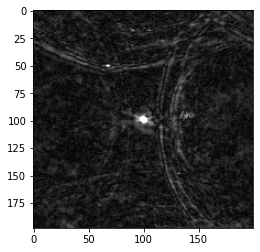

In [10]:
for m in M:
    plt.imshow(abs(m[0, :, :,1]), cmap='gray', vmax=math.sqrt(8)*vmax)
    plt.show()